In [2]:
pip install missingno

  Using cached missingno-0.5.2-py3-none-any.whl.metadata (639 bytes)
Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd
import missingno as msno

## 1. Evaluate Current Inventory Management Practices

Analyze how well the gas stations manage their fuel inventory and order quantities.

### Data Preprocessing

Concatenate Fuel_Level_Part_1.csv and Fuel_Level_Part_2.csv. 

Merge the Tanks.csv, Locations.csv, and Invoices.csv datasets. 

Clean datasets and handle missing values.

### Visualize Fuel Levels
Create visualizations for each tank to assess inventory trends over time. Identify stations with effective inventory management practices and those at risk of stockouts.

### Quantify Current Performance
Analyze the Invoices.csv dataset to evaluate current purchasing patterns. Calculate cost savings achieved via discounts for stations 1–8.



In [35]:
# Concatenate Fuel_Level_Part_1.csv and Fuel_Level_Part_2.csv. 

Fuel_Level_Part_1 = pd.read_csv("Fuel_Level_Part_1.csv")
Fuel_Level_Part_2 = pd.read_csv("Fuel_Level_Part_2.csv")

Fuel_Level_Part_1.rename(columns = {"Fuel Level": "Fuel_Level", "Time stamp" : "Timestamp"}, inplace = True)

FuelLevel = pd.concat ([Fuel_Level_Part_1, Fuel_Level_Part_2], axis = 0) 
FuelLevel.head(10)

,Tank ID,Fuel_Level,Timestamp
0,T 12,27161.0,1/1/2017 0:10
1,T 12,27017.0,1/1/2017 0:25
2,T 12,26934.0,1/1/2017 0:40
3,T12,NaN,1/1/2017 0:45
4,T 12,26786.0,1/1/2017 0:55


In [49]:
# Merge the Tanks.csv, Locations.csv, and Invoices.csv datasets. 

# Reading the dataset from csv
Tanks = pd.read_csv("Tanks.csv")
Locations = pd.read_csv("Locations.csv")
Invoices = pd.read_csv("Invoices.csv")

# renaming columns prepraring for merging
Tanks.rename(columns = {'Tank Location': 'Gas Station Location'}, inplace = True)
Invoices.rename(columns = {'Invoice Gas Station Location': 'Gas Station Location'}, inplace = True)

# Merging datasets
Merged = Locations.merge(Tanks, on = "Gas Station Location", how = "outer")
Merged = Merged.merge(Invoices, on = "Gas Station Location", how = "outer")


<class 'pandas.core.frame.DataFrame'>
Index: 12528 entries, 0 to 12527
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gas Station Location   12528 non-null  int64  
 1   Gas Station Name       12528 non-null  object 
 2   Gas Station Address    12528 non-null  object 
 3   Gas Station Latitude   12528 non-null  float64
 4   Gas Station Longitude  12528 non-null  float64
 5   Tank ID                12528 non-null  object 
 6   Tank Number            12528 non-null  float64
 7   Tank Type              12528 non-null  object 
 8   Tank Capacity          12528 non-null  float64
 9   Invoice Date           12528 non-null  object 
 10  Invoice ID             12418 non-null  float64
 11  Gross Purchase Cost    12412 non-null  float64
 12  Amount Purchased       12412 non-null  float64
 13  Fuel Type              12412 non-null  object 
dtypes: float64(7), int64(1), object(6)
memory usage: 1.4+ MB


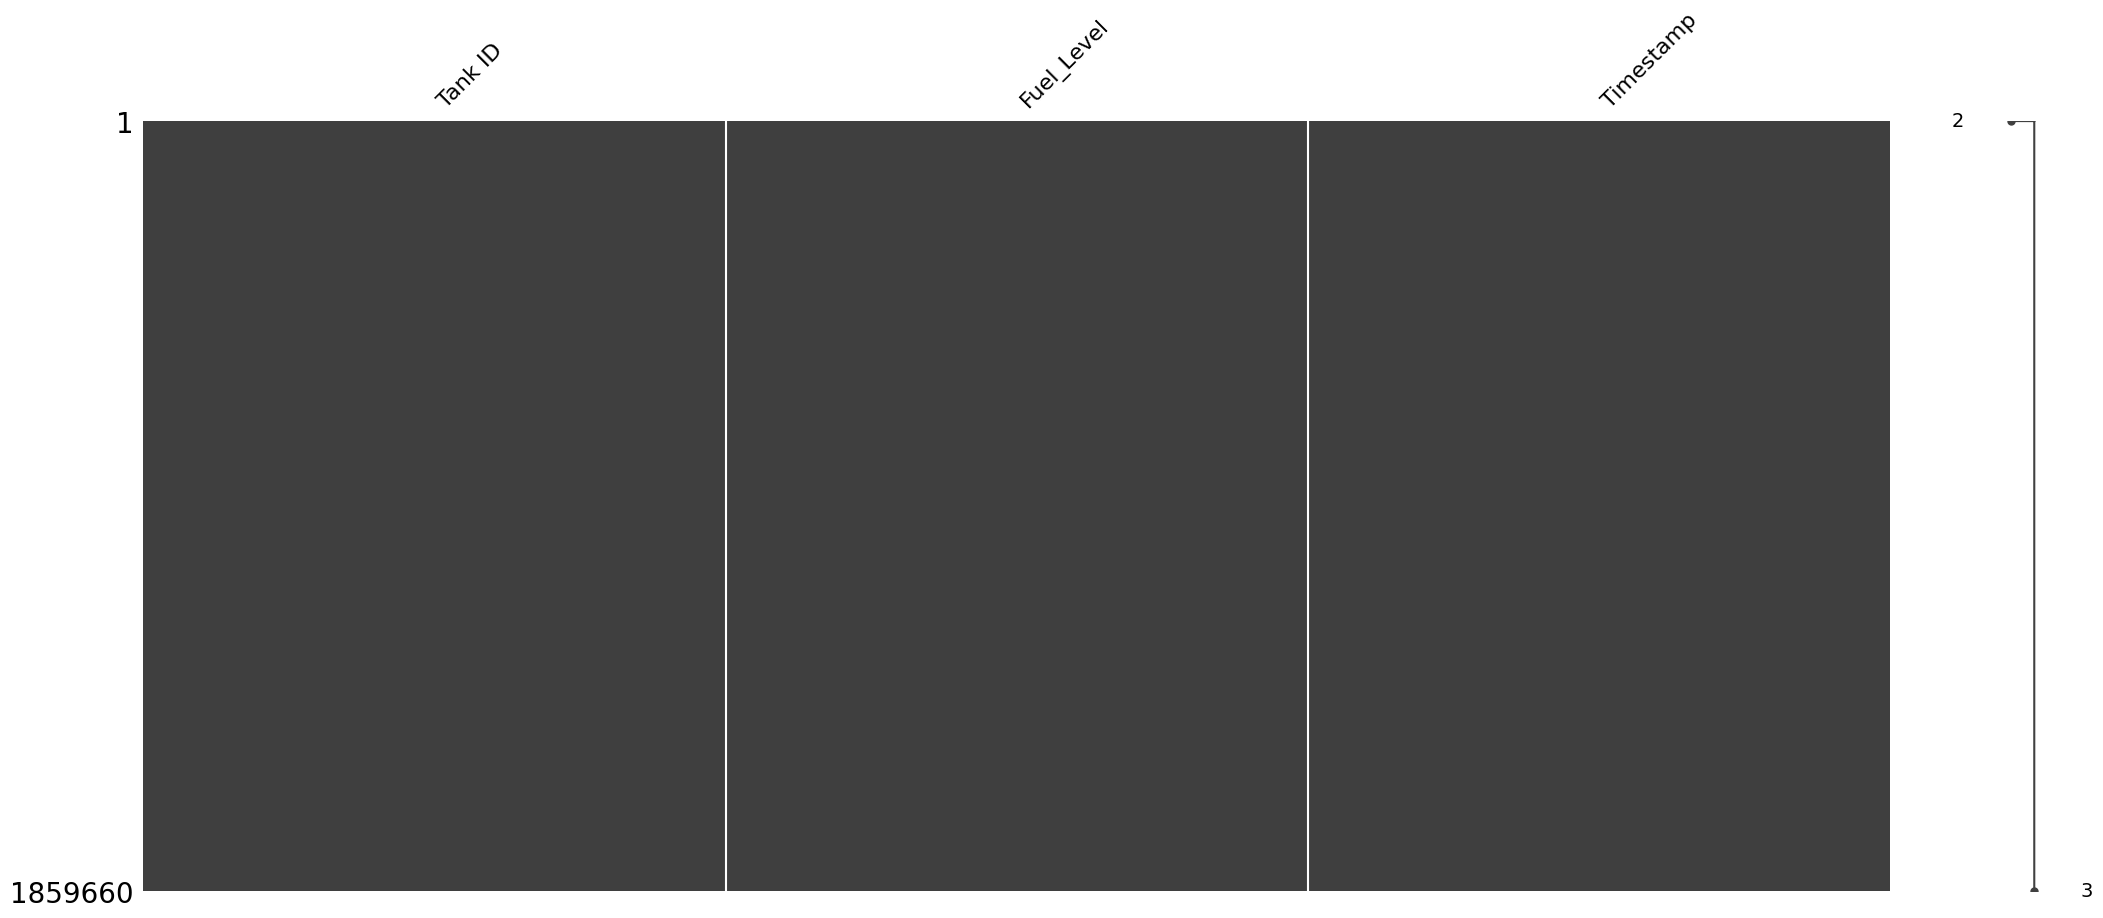

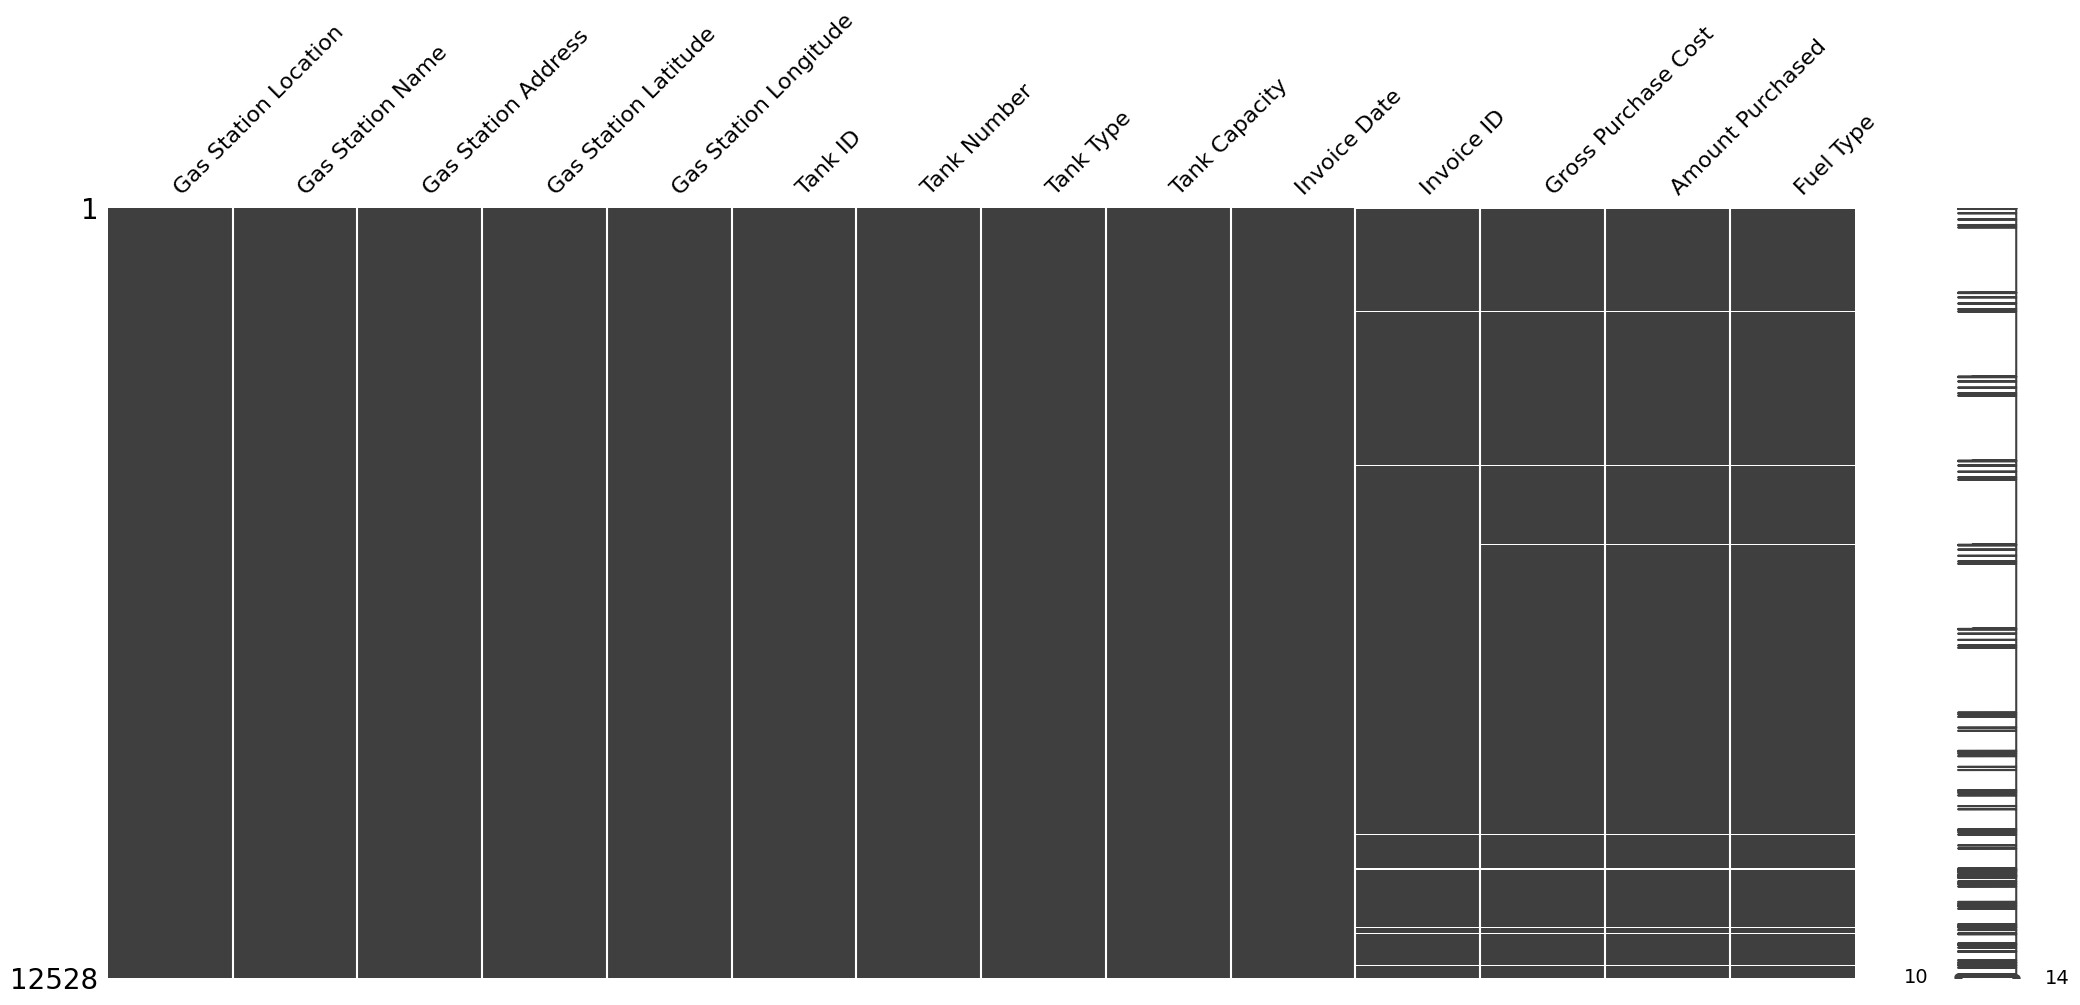

In [48]:
# Clean datasets and handle missing values.

msno.matrix(FuelLevel)
# Fuel Level dataset has no missing value

msno.matrix(Merged)

# drop if 10 values are missing
Merged.dropna(thresh= 10, inplace= True)
Merged.info()

# handling other missing values ?

### 2. Recommend Improved Ordering Strategies

Propose strategies to improve fuel order quantities and save costs.

#### Quantify Maximum Potential Savings:

Use the total tank capacity for each location and fuel type to determine the highest applicable discount rate.

Calculate a 7-day inventory threshold based on the average daily consumption for each location and fuel type.

Compute potential savings by optimizing order quantities to maximize discounts while maintaining sufficient inventory.

#### Provide Recommendations:
Offer specific recommendations to improve inventory policies and estimate potential cost savings for each location.

### 3. Identify the Best Day for Fuel Orders

Analyze whether a specific day of the week consistently offers lower fuel prices.

#### • Examine the distribution of price-per-liter rates by day of the week.

#### • Identify the day with the lowest historical rates.

#### • Calculate additional savings if purchases were consistently made on the identified day.


### 4. Evaluate the Feasibility of Adding Tanks

Assess whether increasing tank capacity at certain locations would be beneficial.

#### • Assume the cost of adding a new tank and the average inflation rate.
#### • Estimate the cost-benefit of increased capacity over a 5-year period.
#### • Identify locations that would benefit most from additional tanks.
